In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import HTML
import warnings
pd.set_option('max_columns', None)
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)

In [184]:
train = pd.read_csv('../data/train.csv')
label = pd.read_csv('../data/train_label.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/submission.csv')

In [115]:
submission.head()

,ID,Label
0,0,0.1
1,2,0.1
2,4,0.1
3,5,0.1
4,6,0.1


In [166]:
cat_feat = ['管辖机关', '企业类别','行业门类','行业代码','企业状态','邮政编码','登记机关','企业类型']
train = train.fillna(-1)
for item in cat_feat:
    print(item, len(set(train[item])))

管辖机关 14
企业类别 5
行业门类 20
行业代码 659
企业状态 5
邮政编码 314
登记机关 14
企业类型 79


In [185]:
import json
ct = []
hydm = list(train['行业代码'])
for i in hydm:
    ct.append(i)
    
from collections import Counter
dic = dict(Counter(ct))
sorted(dic.items(), key = lambda x:x[1], reverse=True)
# act_hist = np.histogram(list(dic.values()),bins=4,range=(0,40))
# act_hist

[(7249.0, 2806),
 (4790.0, 1200),
 (7010.0, 378),
 (5199.0, 339),
 (7299.0, 218),
 (5165.0, 218),
 (5821.0, 217),
 (5174.0, 209),
 (5011.0, 183),
 (5439.0, 161),
 (5090.0, 150),
 (1819.0, 148),
 (3484.0, 133),
 (5299.0, 130),
 (5181.0, 124),
 (7020.0, 117),
 (6760.0, 109),
 (5175.0, 109),
 (5169.0, 106),
 (5172.0, 94),
 (3311.0, 91),
 (5132.0, 88),
 (5131.0, 87),
 (8290.0, 86),
 (7590.0, 81),
 (7212.0, 75),
 (5229.0, 74),
 (5164.0, 72),
 (6210.0, 72),
 (7239.0, 69),
 (5179.0, 68),
 (2110.0, 67),
 (7320.0, 67),
 (4910.0, 66),
 (6591.0, 66),
 (4899.0, 65),
 (7251.0, 65),
 (6519.0, 63),
 (4190.0, 61),
 (6629.0, 60),
 (5154.0, 59),
 (2929.0, 59),
 (8060.0, 57),
 (8090.0, 56),
 (3670.0, 55),
 (7211.0, 55),
 (5219.0, 53),
 (5136.0, 49),
 (6599.0, 48),
 (6560.0, 47),
 (5129.0, 46),
 (7243.0, 45),
 (3525.0, 45),
 (4851.0, 44),
 (7499.0, 43),
 (7840.0, 42),
 (5138.0, 42),
 (3499.0, 41),
 (5232.0, 40),
 (7030.0, 39),
 (3429.0, 39),
 (8211.0, 38),
 (5126.0, 38),
 (141.0, 37),
 (3989.0, 37),
 (231

In [18]:
train_data['登记机关'].fillna(-1)
train_data['管辖机关'].fillna(-2)
e = train_data[train_data['登记机关'] == train_data['管辖机关']]

In [108]:
begin = {}
end = {}
for item in train_data.columns:
    parts = item.split("_")
    if len(parts) == 2:
        if parts[1] == '年初数':
            begin[parts[0]] = item
        elif parts[1] == '年末数':
            end[parts[0]] = item

In [111]:
for item in begin:
    if item not in end:
        print(item)

In [20]:
len(e[e['Label']==1])/941

0.5441020191285866

In [21]:
len(e[e['Label']==0])/13425

0.542048417132216

In [99]:
train_data = pd.merge(train,label,on='ID')

In [62]:
sub_table = train_data[['货币资金_年初数','货币资金_年末数','Label']]

In [72]:
sub_table[(sub_table['Label'] == 0) & (sub_table['货币资金_年初数'] != -1)]

,货币资金_年初数,货币资金_年末数,Label
0,24.579246,31.416284,0
4,264.780024,144.977022,0
8,744.732610,625.751560,0
9,36.129958,51.712366,0
11,0.009862,70.756299,0
...,...,...,...
14354,70.592818,72.801164,0
14356,14.368916,4.016815,0
14358,24.395761,1.299279,0
14359,12.987730,47.642046,0


In [161]:
sub = train_data.query('经营期限至 == 经营期限自')
len(sub[sub['Label']==1])/941

0.22210414452709884

In [162]:
sub = train_data.query('经营期限至 == 经营期限自')
len(sub[sub['Label']==0])/13425

0.17966480446927374

In [26]:
train_data.head(20)

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,注销时间,经营期限自,成立日期,行业门类,企业类别,管辖机关,经营范围,增值税,企业所得税,印花税,教育费,城建税,递延收益_年初数,长期负债合计_年初数,长期借款_年初数,长期应付款_年初数,短期借款_年初数,递延所得税负债_年初数,非流动负债合计_年初数,负债合计_年初数,负债和所有者权益总计_年初数,交易性金融负债_年初数,流动负债合计_年初数,其他非流动负债_年初数,其他负债（或长期负债）_年初数,其他流动负债_年初数,其他应付款_年初数,其他应交款_年初数,实收资本（股本）_年初数,实收资本（或股本）净额_年初数,所有者权益合计_年初数,未分配利润_年初数,小企业_应付利润_年初数,应付福利费_年初数,应付股利_年初数,应付利息_年初数,应付票据_年初数,应付职工薪酬_年初数,应付债券_年初数,应付账款_年初数,预计负债_年初数,应交税费_年初数,一年内到期的非流动负债_年初数,预提费用_年初数,预收款项_年初数,盈余公积_年初数,资本公积_年初数,专项应付款_年初数,递延收益_年末数,长期负债合计_年末数,长期借款_年末数,长期应付款_年末数,短期借款_年末数,递延所得税负债_年末数,非流动负债合计_年末数,负债合计_年末数,负债和所有者权益总计_年末数,交易性金融负债_年末数,流动负债合计_年末数,其他非流动负债_年末数,其他负债（或长期负债）_年末数,其他流动负债_年末数,其他应付款_年末数,其他应交款_年末数,实收资本（股本）_年末数,实收资本（或股本）净额_年末数,所有者权益合计_年末数,未分配利润_年末数,小企业_应付利润_年末数,应付福利费_年末数,应付股利_年末数,应付利息_年末数,应付票据_年末数,应付职工薪酬_年末数,应付债券_年末数,应付账款_年末数,预计负债_年末数,应交税费_年末数,一年内到期的非流动负债_年末数,预提费用_年末数,预收款项_年末数,盈余公积_年末数,资本公积_年末数,专项应付款_年末数,货币资金_年初数,存货_年初数,存货中的原材料_年初数,存货中的周转材料_年初数,长期待摊费用_年初数,长期股权投资_年初数,长期投资合计_年初数,长期应收款_年初数,持有至到期投资_年初数,短期投资_年初数,待摊费用_年初数,递延所得税资产_年初数,非流动资产合计_年初数,工程物资_年初数,固定资产合计_年初数,固定资产净额_年初数,固定资产净值_年初数,固定资产清理_年初数,固定资产原价_年初数,交易性金融资产_年初数,库存商品(产成品)_年初数,开发支出_年初数,可供出售金融资产_年初数,流动资产合计_年初数,其他非流动资产_年初数,其他流动资产_年初数,其他应收款_年初数,生产性生物资产_年初数,商誉_年初数,投资性房地产_年初数,无形资产_年初数,无形资产及其他资产合计_年初数,应收账款_年初数,一年内到期的非流动资产_年初数,油气资产_年初数,应收补贴款_年初数,应收股利_年初数,应收利息_年初数,应收票据_年初数,预付款项_年初数,资产总计_年初数,在建工程_年初数,货币资金_年末数,存货_年末数,存货中的原材料_年末数,存货中的周转材料_年末数,长期待摊费用_年末数,长期股权投资_年末数,长期投资合计_年末数,长期应收款_年末数,持有至到期投资_年末数,短期投资_年末数,待摊费用_年末数,递延所得税资产_年末数,非流动资产合计_年末数,工程物资_年末数,固定资产合计_年末数,固定资产净额_年末数,固定资产净值_年末数,固定资产清理_年末数,固定资产原价_年末数,交易性金融资产_年末数,库存商品(产成品)_年末数,开发支出_年末数,可供出售金融资产_年末数,流动资产合计_年末数,其他非流动资产_年末数,其他流动资产_年末数,其他应收款_年末数,生产性生物资产_年末数,商誉_年末数,投资性房地产_年末数,无形资产_年末数,无形资产及其他资产合计_年末数,应收账款_年末数,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数,Label
0,1,9.0,NaN,1.0,0.0,266300,19.110000,19.110000,00:00.0,5154.0,NaN,00:00.0,00:00.0,1.0,0.0,1.0,"[1412, 1024, 21375, 15023, 18526, 18789, 17022...",106.039650,0.331552,1.247218,3.181189,7.422776,0.0,0.0,25.110484,0.0,0.000000,0.0,25.110484,797.386637,844.162546,0.0,772.276153,0.0,0.0,0.000000,106.078436,0.0,50.220972,0.0,46.775910,-3.445063,0.0,0.0,0.0,0.0,125.552431,0.000000,0.0,520.839979,0.0,19.805307,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,585.013852,632.032182,0.0,585.013852,0.0,0.0,0.000000,83.123866,0.0,50.220972,0.0,47.018330,-3.202643,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,489.934244,0.0,11.955743,0.0,0.0,0.000000,0.000000,0.000000,0.0,24.579246,462.290647,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,135.081011,0.00000,135.081011,0.0,0.0,0.0,368.329907,0.0,0.00000,0.0,0.0,709.081535,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,215.371727,0.0,0.0,0.0,0.0,0.0,2.647788,4.192126,844.162546,0.0,31.416284,229.147518,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,80.128884,0.0,0.0,99.813781,0.00000,99.813781,0.0,0.0,0.0,368.329907,0.0,0.000000,0.0,0.0,532.218401,0.0,0.0,20.088389,0.0,0.0,0.0,0.000000,0.0,142.310005,0.0,0.0,0.0,0.0,0.0,28.122902,1.004419,632.032182,0.000000,0
1,3,11.0,NaN,5.0,0.0,266000,29.154194,19.210446,00:00.0,7214.0,NaN,31:40.0,31:40.0,0.0,2.0,3.0,"[3671, 24856, 13525, 21079, 13219, 13694, 1442...",39.175600,51.244655,0.014363,1.175269,2.742293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,9,0.0,NaN,3.0,0.0,266000,NaN,19.120045,13:31.0,2110.0,NaN,13:31.0,13:31.0,2.0,0.0,4.0,"[3671, 14394, 23662, 11227, 19205, 15633, 5344...",0.000000,0.000000,0.541067,4.637491,10.0603

In [34]:
import json
ct = []
jyfw = list(train_data['经营范围'])
for i in jyfw:
    g = json.loads(i)
    ct+=g

In [117]:
from collections import Counter
dic = dict(Counter(ct))
len(dic)


23037

In [142]:
import numpy as np
act_hist = np.histogram(list(dic.values()),bins=4,range=(128,256))
act_hist

(array([24, 24, 21,  9]), array([128., 160., 192., 224., 256.]))

In [118]:
sorted(dic.items(), key = lambda x:x[1], reverse=True)

[(19435, 8047),
 (1491, 8021),
 (6701, 5326),
 (5344, 5282),
 (4986, 3858),
 (15770, 2941),
 (2276, 2660),
 (23461, 2658),
 (11227, 2522),
 (26649, 2417),
 (5089, 1890),
 (3671, 1852),
 (8046, 1612),
 (13587, 1545),
 (7909, 1450),
 (15235, 1405),
 (11475, 1352),
 (7503, 1300),
 (3180, 1281),
 (22133, 1261),
 (12710, 1248),
 (5739, 1155),
 (4376, 1150),
 (23614, 1126),
 (20961, 1058),
 (18714, 1054),
 (21619, 1047),
 (6284, 1045),
 (21493, 1039),
 (17294, 1034),
 (4894, 1033),
 (21094, 1027),
 (8635, 1019),
 (19213, 1011),
 (18823, 1008),
 (3714, 1006),
 (24166, 1005),
 (3579, 1005),
 (21305, 1000),
 (25129, 1000),
 (17847, 999),
 (7668, 998),
 (21148, 994),
 (24858, 993),
 (13573, 993),
 (16759, 992),
 (5596, 992),
 (19981, 992),
 (7990, 990),
 (5767, 990),
 (25660, 990),
 (24610, 990),
 (4085, 990),
 (13940, 990),
 (1754, 990),
 (7314, 990),
 (5328, 990),
 (19113, 990),
 (14664, 990),
 (6936, 970),
 (19479, 915),
 (18877, 878),
 (23662, 861),
 (10536, 835),
 (21114, 825),
 (5014, 771)

In [35]:
train_data[train_data['Label']==0]

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,注销时间,经营期限自,成立日期,行业门类,企业类别,管辖机关,经营范围,增值税,企业所得税,印花税,教育费,城建税,递延收益_年初数,长期负债合计_年初数,长期借款_年初数,长期应付款_年初数,短期借款_年初数,递延所得税负债_年初数,非流动负债合计_年初数,负债合计_年初数,负债和所有者权益总计_年初数,交易性金融负债_年初数,流动负债合计_年初数,其他非流动负债_年初数,其他负债（或长期负债）_年初数,其他流动负债_年初数,其他应付款_年初数,其他应交款_年初数,实收资本（股本）_年初数,实收资本（或股本）净额_年初数,所有者权益合计_年初数,未分配利润_年初数,小企业_应付利润_年初数,应付福利费_年初数,应付股利_年初数,应付利息_年初数,应付票据_年初数,应付职工薪酬_年初数,应付债券_年初数,应付账款_年初数,预计负债_年初数,应交税费_年初数,一年内到期的非流动负债_年初数,预提费用_年初数,预收款项_年初数,盈余公积_年初数,资本公积_年初数,专项应付款_年初数,递延收益_年末数,长期负债合计_年末数,长期借款_年末数,长期应付款_年末数,短期借款_年末数,递延所得税负债_年末数,非流动负债合计_年末数,负债合计_年末数,负债和所有者权益总计_年末数,交易性金融负债_年末数,流动负债合计_年末数,其他非流动负债_年末数,其他负债（或长期负债）_年末数,其他流动负债_年末数,其他应付款_年末数,其他应交款_年末数,实收资本（股本）_年末数,实收资本（或股本）净额_年末数,所有者权益合计_年末数,未分配利润_年末数,小企业_应付利润_年末数,应付福利费_年末数,应付股利_年末数,应付利息_年末数,应付票据_年末数,应付职工薪酬_年末数,应付债券_年末数,应付账款_年末数,预计负债_年末数,应交税费_年末数,一年内到期的非流动负债_年末数,预提费用_年末数,预收款项_年末数,盈余公积_年末数,资本公积_年末数,专项应付款_年末数,货币资金_年初数,存货_年初数,存货中的原材料_年初数,存货中的周转材料_年初数,长期待摊费用_年初数,长期股权投资_年初数,长期投资合计_年初数,长期应收款_年初数,持有至到期投资_年初数,短期投资_年初数,待摊费用_年初数,递延所得税资产_年初数,非流动资产合计_年初数,工程物资_年初数,固定资产合计_年初数,固定资产净额_年初数,固定资产净值_年初数,固定资产清理_年初数,固定资产原价_年初数,交易性金融资产_年初数,库存商品(产成品)_年初数,开发支出_年初数,可供出售金融资产_年初数,流动资产合计_年初数,其他非流动资产_年初数,其他流动资产_年初数,其他应收款_年初数,生产性生物资产_年初数,商誉_年初数,投资性房地产_年初数,无形资产_年初数,无形资产及其他资产合计_年初数,应收账款_年初数,一年内到期的非流动资产_年初数,油气资产_年初数,应收补贴款_年初数,应收股利_年初数,应收利息_年初数,应收票据_年初数,预付款项_年初数,资产总计_年初数,在建工程_年初数,货币资金_年末数,存货_年末数,存货中的原材料_年末数,存货中的周转材料_年末数,长期待摊费用_年末数,长期股权投资_年末数,长期投资合计_年末数,长期应收款_年末数,持有至到期投资_年末数,短期投资_年末数,待摊费用_年末数,递延所得税资产_年末数,非流动资产合计_年末数,工程物资_年末数,固定资产合计_年末数,固定资产净额_年末数,固定资产净值_年末数,固定资产清理_年末数,固定资产原价_年末数,交易性金融资产_年末数,库存商品(产成品)_年末数,开发支出_年末数,可供出售金融资产_年末数,流动资产合计_年末数,其他非流动资产_年末数,其他流动资产_年末数,其他应收款_年末数,生产性生物资产_年末数,商誉_年末数,投资性房地产_年末数,无形资产_年末数,无形资产及其他资产合计_年末数,应收账款_年末数,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数,Label
0,1,9.0,NaN,1.0,0.0,266300,19.110000,19.110000,00:00.0,5154.0,NaN,00:00.0,00:00.0,1.0,0.0,1.0,"[1412, 1024, 21375, 15023, 18526, 18789, 17022...",106.039650,0.331552,1.247218,3.181189,7.422776,0.0,0.0,25.110484,0.0,0.0,0.0,25.110484,797.386637,844.162546,0.0,772.276153,0.0,0.0,0.0,106.078436,0.0,50.220972,0.0,46.775910,-3.445063,0.0,0.0,0.0,0.0,125.552431,0.000000,0.0,520.839979,0.0,19.805307,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.013852,632.032182,0.0,585.013852,0.0,0.0,0.0,83.123866,0.0,50.220972,0.0,47.018330,-3.202643,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,489.934244,0.0,11.955743,0.0,0.0,0.000000,0.0,0.0,0.0,24.579246,462.290647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.081011,0.0,135.081011,0.0,0.0,0.0,368.329907,0.0,0.0,0.0,0.0,709.081535,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,215.371727,0.0,0.0,0.0,0.0,0.0,2.647788,4.192126,844.162546,0.0,31.416284,229.147518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.128884,0.0,0.0,99.813781,0.0,99.813781,0.0,0.0,0.0,368.329907,0.0,0.0,0.0,0.0,532.218401,0.0,0.0,20.088389,0.0,0.0,0.0,0.0,0.0,142.310005,0.0,0.0,0.0,0.0,0.0,28.122902,1.004419,632.032182,0.0,0
1,3,11.0,NaN,5.0,0.0,266000,29.154194,19.210446,00:00.0,7214.0,NaN,31:40.0,31:40.0,0.0,2.0,3.0,"[3671, 24856, 13525, 21079, 13219, 13694, 1442...",39.175600,51.244655,0.014363,1.175269,2.742293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,9,0.0,NaN,3.0,0.0,266000,NaN,19.120045,13:31.0,2110.0,NaN,13:31.0,13:31.0,2.0,0.0,4.0,"[3671, 14394, 23662, 11227, 19205, 15633, 5344...",0.000000,0.000000,0.541067,4.637491,10.060346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [36]:
train_data[train_data['Label']==1]

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,注销时间,经营期限自,成立日期,行业门类,企业类别,管辖机关,经营范围,增值税,企业所得税,印花税,教育费,城建税,递延收益_年初数,长期负债合计_年初数,长期借款_年初数,长期应付款_年初数,短期借款_年初数,递延所得税负债_年初数,非流动负债合计_年初数,负债合计_年初数,负债和所有者权益总计_年初数,交易性金融负债_年初数,流动负债合计_年初数,其他非流动负债_年初数,其他负债（或长期负债）_年初数,其他流动负债_年初数,其他应付款_年初数,其他应交款_年初数,实收资本（股本）_年初数,实收资本（或股本）净额_年初数,所有者权益合计_年初数,未分配利润_年初数,小企业_应付利润_年初数,应付福利费_年初数,应付股利_年初数,应付利息_年初数,应付票据_年初数,应付职工薪酬_年初数,应付债券_年初数,应付账款_年初数,预计负债_年初数,应交税费_年初数,一年内到期的非流动负债_年初数,预提费用_年初数,预收款项_年初数,盈余公积_年初数,资本公积_年初数,专项应付款_年初数,递延收益_年末数,长期负债合计_年末数,长期借款_年末数,长期应付款_年末数,短期借款_年末数,递延所得税负债_年末数,非流动负债合计_年末数,负债合计_年末数,负债和所有者权益总计_年末数,交易性金融负债_年末数,流动负债合计_年末数,其他非流动负债_年末数,其他负债（或长期负债）_年末数,其他流动负债_年末数,其他应付款_年末数,其他应交款_年末数,实收资本（股本）_年末数,实收资本（或股本）净额_年末数,所有者权益合计_年末数,未分配利润_年末数,小企业_应付利润_年末数,应付福利费_年末数,应付股利_年末数,应付利息_年末数,应付票据_年末数,应付职工薪酬_年末数,应付债券_年末数,应付账款_年末数,预计负债_年末数,应交税费_年末数,一年内到期的非流动负债_年末数,预提费用_年末数,预收款项_年末数,盈余公积_年末数,资本公积_年末数,专项应付款_年末数,货币资金_年初数,存货_年初数,存货中的原材料_年初数,存货中的周转材料_年初数,长期待摊费用_年初数,长期股权投资_年初数,长期投资合计_年初数,长期应收款_年初数,持有至到期投资_年初数,短期投资_年初数,待摊费用_年初数,递延所得税资产_年初数,非流动资产合计_年初数,工程物资_年初数,固定资产合计_年初数,固定资产净额_年初数,固定资产净值_年初数,固定资产清理_年初数,固定资产原价_年初数,交易性金融资产_年初数,库存商品(产成品)_年初数,开发支出_年初数,可供出售金融资产_年初数,流动资产合计_年初数,其他非流动资产_年初数,其他流动资产_年初数,其他应收款_年初数,生产性生物资产_年初数,商誉_年初数,投资性房地产_年初数,无形资产_年初数,无形资产及其他资产合计_年初数,应收账款_年初数,一年内到期的非流动资产_年初数,油气资产_年初数,应收补贴款_年初数,应收股利_年初数,应收利息_年初数,应收票据_年初数,预付款项_年初数,资产总计_年初数,在建工程_年初数,货币资金_年末数,存货_年末数,存货中的原材料_年末数,存货中的周转材料_年末数,长期待摊费用_年末数,长期股权投资_年末数,长期投资合计_年末数,长期应收款_年末数,持有至到期投资_年末数,短期投资_年末数,待摊费用_年末数,递延所得税资产_年末数,非流动资产合计_年末数,工程物资_年末数,固定资产合计_年末数,固定资产净额_年末数,固定资产净值_年末数,固定资产清理_年末数,固定资产原价_年末数,交易性金融资产_年末数,库存商品(产成品)_年末数,开发支出_年末数,可供出售金融资产_年末数,流动资产合计_年末数,其他非流动资产_年末数,其他流动资产_年末数,其他应收款_年末数,生产性生物资产_年末数,商誉_年末数,投资性房地产_年末数,无形资产_年末数,无形资产及其他资产合计_年末数,应收账款_年末数,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数,Label
7,17,12.0,NaN,5.0,0.0,266000,19.612210,19.115022,00:00.0,7249.0,NaN,00:00.0,00:00.0,0.0,2.0,3.0,"[7047, 15560, 14047, 1491, 19435]",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24,43,1.0,NaN,0.0,1.0,NaN,NaN,19.112511,42:06.0,7249.0,54:59.0,42:06.0,42:06.0,0.0,1.0,0.0,"[23461, 2276, 5344, 6701]",0.038120,0.003588,0.004284,0.001906,0.002668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25,46,1.0,NaN,0.0,1.0,NaN,NaN,19.112511,42:06.0,7249.0,54:59.0,42:06.0,42:06.0,0.0,1.0,0.0,"[23461, 2276, 5344, 6701]",21.302872,3.957759,NaN,0.696440,1.625028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3004.421288,15925.574684,0.0,3004.421288,0.0,0.0,1220.015877,1733.960984,0.0,12555.24307,0.0,12921.153395,28.400279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.625954,0.0,10.221621,0.0,0.0,18.596851,0.0,337.510044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2782.732428,15700.120797,0.0,2782.732428,0.0,0.0,1037.215101,1728.652313,0.0,12555.24307,0.0,12917.388369,24.635255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.625954,0.0,-4.760941,0.0,0.0,0.0,0.0,337.510044,0.0,167

In [8]:
train_data['成立日期'].value_counts()

00:00.0    2930
42:06.0    2659
07:34.0     993
-1          770
13:31.0      32
           ... 
46:13.0       1
59:29.0       1
25:32.0       1
53:50.0       1
44:00.0       1
Name: 成立日期, Length: 2655, dtype: int64

In [23]:
for c in train_data.columns:
    print(c, train_data[c].value_counts)

ID <bound method IndexOpsMixin.value_counts of 0            1
1            3
2            9
3           10
4           14
         ...  
14361    23937
14362    23940
14363    23941
14364    23942
14365    23943
Name: ID, Length: 14366, dtype: int64>
企业类型 <bound method IndexOpsMixin.value_counts of 0         9.0
1        11.0
2         0.0
3         0.0
4         0.0
         ... 
14361     0.0
14362    35.0
14363     2.0
14364     1.0
14365     0.0
Name: 企业类型, Length: 14366, dtype: float64>
经营期限至 <bound method IndexOpsMixin.value_counts of 0            NaN
1            NaN
2            NaN
3        42:05.0
4            NaN
          ...   
14361        NaN
14362        NaN
14363        NaN
14364        NaN
14365        NaN
Name: 经营期限至, Length: 14366, dtype: object>
登记机关 <bound method IndexOpsMixin.value_counts of 0        1.0
1        5.0
2        3.0
3        9.0
4        2.0
        ... 
14361    1.0
14362    4.0
14363    1.0
14364    0.0
14365    1.0
Name: 登记机关, Length: 14366, dtyp

Name: 油气资产_年末数, Length: 14366, dtype: float64>
应收补贴款_年末数 <bound method IndexOpsMixin.value_counts of 0        0.0
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
14361    NaN
14362    NaN
14363    NaN
14364    NaN
14365    NaN
Name: 应收补贴款_年末数, Length: 14366, dtype: float64>
应收股利_年末数 <bound method IndexOpsMixin.value_counts of 0        0.0
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
14361    NaN
14362    NaN
14363    NaN
14364    NaN
14365    NaN
Name: 应收股利_年末数, Length: 14366, dtype: float64>
应收利息_年末数 <bound method IndexOpsMixin.value_counts of 0        0.0
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
14361    NaN
14362    NaN
14363    NaN
14364    NaN
14365    NaN
Name: 应收利息_年末数, Length: 14366, dtype: float64>
应收票据_年末数 <bound method IndexOpsMixin.value_counts of 0        28.122902
1              NaN
2              NaN
3              NaN
4        10.044194
           ...    
14361          NaN
14362          NaN
14363          Na

In [6]:
train_data = train_data.fillna(-1)
set(train_data['核准日期'])

{'51:13.0',
 '08:11.0',
 '54:34.0',
 '16:44.0',
 '05:51.0',
 '45:49.0',
 '55:21.0',
 '28:55.0',
 '19:58.0',
 '00:30.0',
 '18:06.0',
 '15:29.0',
 '19:12.0',
 '08:25.0',
 '20:58.0',
 '41:14.0',
 '07:11.0',
 '51:36.0',
 '45:52.0',
 '10:31.0',
 '57:08.0',
 '55:33.0',
 '29:07.0',
 '53:21.0',
 '32:37.0',
 '50:01.0',
 '11:45.0',
 '59:10.0',
 '38:33.0',
 '02:11.0',
 '45:16.0',
 '06:54.0',
 '22:42.0',
 '36:21.0',
 '07:51.0',
 '17:16.0',
 '04:26.0',
 '31:12.0',
 '33:18.0',
 '32:06.0',
 '08:30.0',
 '39:29.0',
 '14:06.0',
 '07:58.0',
 '03:05.0',
 '03:52.0',
 '27:27.0',
 '23:43.0',
 '46:25.0',
 '48:27.0',
 '57:25.0',
 '40:51.0',
 '20:52.0',
 '17:35.0',
 '16:43.0',
 '20:47.0',
 '25:39.0',
 '08:17.0',
 '36:29.0',
 '31:40.0',
 '00:29.0',
 '35:58.0',
 '12:44.0',
 '18:16.0',
 '10:55.0',
 '58:56.0',
 '27:42.0',
 '47:58.0',
 '30:49.0',
 '41:30.0',
 '11:24.0',
 '07:10.0',
 '51:25.0',
 '05:10.0',
 '07:44.0',
 '14:31.0',
 '36:23.0',
 '21:20.0',
 '21:22.0',
 '10:12.0',
 '35:12.0',
 '37:15.0',
 '21:29.0',
 '07

In [20]:
train_data.shape

(14366, 179)

In [4]:
label.head()

,ID,Label
0,1,0
1,3,0
2,9,0
3,10,0
4,14,0


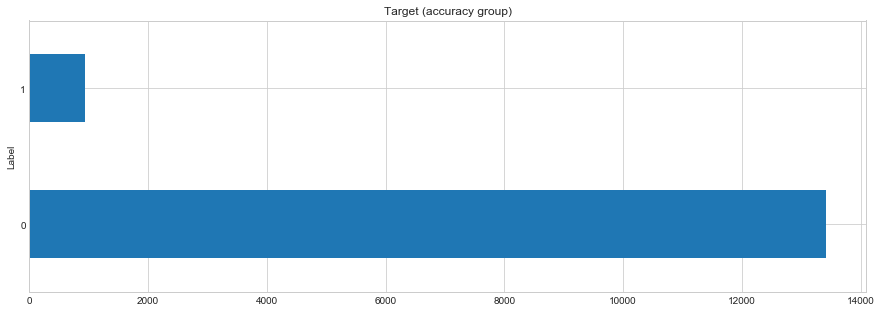

In [5]:
label.groupby('Label')['ID'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuracy group)')
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14366 entries, 0 to 14365
Columns: 178 entries, ID to 在建工程_年末数
dtypes: float64(170), int64(1), object(7)
memory usage: 19.5+ MB


In [38]:
len(train_data[train_data['Label']==1])

941

In [39]:
len(train_data[train_data['Label']==0])

13425

In [10]:
dtype = pd.DataFrame(train.dtypes)
dtype.columns = ['1']

In [11]:
for index, row in dtype.iterrows():
    if row['1'] == 'object':
        print(index, row['1'])

经营期限至 object
邮政编码 object
核准日期 object
注销时间 object
经营期限自 object
成立日期 object
经营范围 object


In [4]:
nullvalue = pd.DataFrame(train_data[train_data['Label']==1].loc[:, train_data.isnull().any()].isnull().sum())
for index, row in nullvalue.iterrows():
    print(index, (row[0]/941).round(2))

企业类型 0.02
经营期限至 0.77
登记机关 0.02
企业状态 0.02
邮政编码 0.31
投资总额 0.83
注册资本 0.02
核准日期 0.02
行业代码 0.02
注销时间 0.79
经营期限自 0.02
成立日期 0.02
行业门类 0.02
企业类别 0.02
管辖机关 0.02
增值税 0.0
企业所得税 0.03
印花税 0.01
城建税 0.0
递延收益_年初数 0.97
长期负债合计_年初数 0.97
长期借款_年初数 0.97
长期应付款_年初数 0.97
短期借款_年初数 0.97
递延所得税负债_年初数 0.97
非流动负债合计_年初数 0.97
负债合计_年初数 0.97
负债和所有者权益总计_年初数 0.97
交易性金融负债_年初数 0.97
流动负债合计_年初数 0.97
其他非流动负债_年初数 0.97
其他负债（或长期负债）_年初数 0.97
其他流动负债_年初数 0.97
其他应付款_年初数 0.97
其他应交款_年初数 0.97
实收资本（股本）_年初数 0.97
实收资本（或股本）净额_年初数 0.97
所有者权益合计_年初数 0.97
未分配利润_年初数 0.97
小企业_应付利润_年初数 0.97
应付福利费_年初数 0.97
应付股利_年初数 0.97
应付利息_年初数 0.97
应付票据_年初数 0.97
应付职工薪酬_年初数 0.97
应付债券_年初数 0.97
应付账款_年初数 0.97
预计负债_年初数 0.97
应交税费_年初数 0.97
一年内到期的非流动负债_年初数 0.97
预提费用_年初数 0.97
预收款项_年初数 0.97
盈余公积_年初数 0.97
资本公积_年初数 0.97
专项应付款_年初数 0.97
递延收益_年末数 0.97
长期负债合计_年末数 0.97
长期借款_年末数 0.97
长期应付款_年末数 0.97
短期借款_年末数 0.97
递延所得税负债_年末数 0.97
非流动负债合计_年末数 0.97
负债合计_年末数 0.97
负债和所有者权益总计_年末数 0.97
交易性金融负债_年末数 0.97
流动负债合计_年末数 0.97
其他非流动负债_年末数 0.97
其他负债（或长期负债）_年末数 0.97
其他流动负债_年末数 0.97
其他应付款_年末数 0.97
其

In [5]:
nullvalue = pd.DataFrame(train_data[train_data['Label']==0].loc[:, train_data.isnull().any()].isnull().sum())
for index, row in nullvalue.iterrows():
    print(index, (row[0]/13425).round(2))

企业类型 0.06
经营期限至 0.81
登记机关 0.06
企业状态 0.06
邮政编码 0.35
投资总额 0.8
注册资本 0.06
核准日期 0.06
行业代码 0.06
注销时间 0.76
经营期限自 0.06
成立日期 0.06
行业门类 0.06
企业类别 0.06
管辖机关 0.06
增值税 0.05
企业所得税 0.21
印花税 0.1
城建税 0.04
递延收益_年初数 0.55
长期负债合计_年初数 0.55
长期借款_年初数 0.55
长期应付款_年初数 0.55
短期借款_年初数 0.55
递延所得税负债_年初数 0.55
非流动负债合计_年初数 0.55
负债合计_年初数 0.55
负债和所有者权益总计_年初数 0.55
交易性金融负债_年初数 0.55
流动负债合计_年初数 0.55
其他非流动负债_年初数 0.55
其他负债（或长期负债）_年初数 0.55
其他流动负债_年初数 0.55
其他应付款_年初数 0.55
其他应交款_年初数 0.55
实收资本（股本）_年初数 0.55
实收资本（或股本）净额_年初数 0.55
所有者权益合计_年初数 0.55
未分配利润_年初数 0.55
小企业_应付利润_年初数 0.55
应付福利费_年初数 0.55
应付股利_年初数 0.55
应付利息_年初数 0.55
应付票据_年初数 0.55
应付职工薪酬_年初数 0.55
应付债券_年初数 0.55
应付账款_年初数 0.55
预计负债_年初数 0.55
应交税费_年初数 0.55
一年内到期的非流动负债_年初数 0.55
预提费用_年初数 0.55
预收款项_年初数 0.55
盈余公积_年初数 0.55
资本公积_年初数 0.55
专项应付款_年初数 0.55
递延收益_年末数 0.55
长期负债合计_年末数 0.55
长期借款_年末数 0.55
长期应付款_年末数 0.55
短期借款_年末数 0.55
递延所得税负债_年末数 0.55
非流动负债合计_年末数 0.55
负债合计_年末数 0.55
负债和所有者权益总计_年末数 0.55
交易性金融负债_年末数 0.55
流动负债合计_年末数 0.55
其他非流动负债_年末数 0.55
其他负债（或长期负债）_年末数 0.55
其他流动负债_年末数 0.55
其他应付款_年末数 0.55
其

In [11]:
train.loc[:, ~train.isnull().any()].isnull().sum()

ID      0
经营范围    0
教育费     0
dtype: int64

In [12]:
train.shape

(14366, 178)

In [13]:
correlations = train.corr()

In [14]:
names = train.columns.tolist()

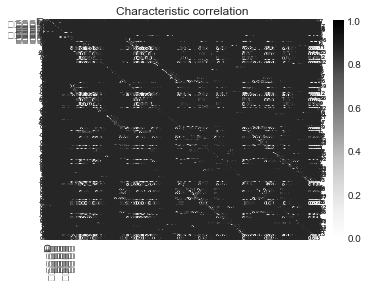

In [15]:
fig = plt.figure() 
ax = fig.add_subplot(figsize=(20,20)) #图片大小为20*20
ax = sns.heatmap(correlations,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})
#热力图参数设置（相关系数矩阵，颜色，每个值间隔等）
#ticks = numpy.arange(0,16,1) #生成0-16，步长为1 
plt.xticks(np.arange(16)+0.5,names) #横坐标标注点
plt.yticks(np.arange(16)+0.5,names) #纵坐标标注点
#ax.set_xticks(ticks) #生成刻度 
#ax.set_yticks(ticks)
#ax.set_xticklabels(names) #生成x轴标签 
#ax.set_yticklabels(names)
ax.set_title('Characteristic correlation')#标题设置
plt.savefig('cluster.tif',dpi=300)
plt.show()


In [16]:
label.shape

(14366, 2)

In [156]:
test_table = pd.DataFrame()
test_table['a'] = [1,2,3,4,5]
def xx(X):
    return

test_table['b'] = test_table['a'].apply(xx)
test_table

,a,b
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None


In [157]:
def db(x):
    return 1,2

test_table['d'],test_table['e'] = test_table['a'].apply(db)

ValueError: too many values to unpack (expected 2)

In [155]:
test_table

,a,b
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None
